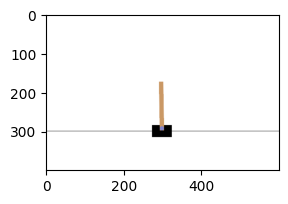

In [2]:
import gym

# 定义环境
class MyWrapper(gym.Wrapper):
  def __init__(self):
    env = gym.make('CartPole-v1', render_mode='rgb_array')
    super().__init__(env)
    self.step_n = 0
    
  def reset(self, seed=None, options=None):
    self.step_n = 0
    return self.env.reset()
  
  def step(self, action):
    self.step_n += 1
    state, reward, truncated, terminated, info = self.env.step(action)
    
    if self.step_n >= 200:
      truncated = True
      terminated = True
      
    return state, reward, truncated, terminated, info
  
  # 打印游戏图像
  def show(self):
    from matplotlib import pyplot as plt
    plt.figure(figsize=(3, 3))
    plt.imshow(self.env.render())
    plt.show()
    
env = MyWrapper()
env.reset()

env.show()

In [3]:
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy

# 初始化模型
model = PPO(policy='MlpPolicy',
            env=make_vec_env(MyWrapper, n_envs=4),
            n_steps=200,
            batch_size=64,
            n_epochs=4,
            gamma=0.998,
            gae_lambda=0.98,
            ent_coef=0.01,
            verbose=0)

# 测试
evaluate_policy(model, env, n_eval_episodes=20, deterministic=False)

c:\Users\fanyu\miniconda3\envs\RL_learning2\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
c:\Users\fanyu\miniconda3\envs\RL_learning2\lib\site-packages\stable_baselines3\ppo\ppo.py:155: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 800`, after every 12 untruncated mini-batches, there will be a truncated mini-batch of size 32
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=200 and n_envs=4)
  warnings.warn(
c:\Users\fanyu\miniconda3\envs\RL_learning2\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transit

(23.25, 13.401026080117896)

In [4]:
# 训练
model.learn(total_timesteps=5_0000, progress_bar=True)
model.save('models/ppo-CartPole-v1')
model = PPO.load('models/ppo-CartPole-v1')
evaluate_policy(model, env, n_eval_episodes=20, deterministic=False)

c:\Users\fanyu\miniconda3\envs\RL_learning2\lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

c:\Users\fanyu\miniconda3\envs\RL_learning2\lib\site-packages\stable_baselines3\common\callbacks.py:703: TqdmExperimentalWarning: rich is experimental/alpha
  self.pbar = tqdm(total=self.locals["total_timesteps"] - self.model.num_timesteps)


c:\Users\fanyu\miniconda3\envs\RL_learning2\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
c:\Users\fanyu\miniconda3\envs\RL_learning2\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(176.15, 40.085252899289536)

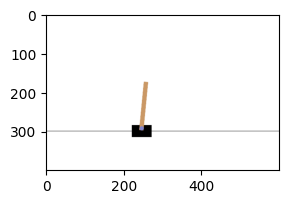

200.0

In [5]:
from IPython import display
import random

def play():
  state, _ = env.reset()
  over = False
  reward_sum = 0
  
  while not over:
    action, _ = model.predict(state)
    state, reward, truncated, terminated, _ = env.step(action)
    over = truncated or terminated
    reward_sum += reward
    
    # 跳帧
    if random.random() < 0.2:
      display.clear_output(wait=True)
      env.show()
      
  return reward_sum

play()